In [1506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense

In [1507]:
data = pd.read_csv("/Users/maxkucher/data_handling/ML_projects/gold_price.csv")
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [1508]:
max(data["SPX"])

2872.870117

In [1509]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [1510]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [1511]:
scaler = MinMaxScaler()

data["SPX"] = scaler.fit_transform(data[["SPX"]])
data["GLD"] = scaler.fit_transform(data[["GLD"]])
data["USO"] = scaler.fit_transform(data[["USO"]])
data["SLV"] = scaler.fit_transform(data[["SLV"]])



In [1512]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,0.350870,0.129680,0.643809,0.164801,1.471692
1,1/3/2008,0.350870,0.135876,0.642896,0.167535,1.474491
2,1/4/2008,0.334693,0.132036,0.633218,0.164462,1.475492
3,1/7/2008,0.336765,0.128894,0.616691,0.161494,1.468299
4,1/8/2008,0.324931,0.146435,0.621804,0.175475,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,0.908507,0.476394,0.055698,0.173392,1.186789
2286,5/9/2018,0.920286,0.474125,0.058528,0.173913,1.184722
2287,5/10/2018,0.931796,0.481543,0.058893,0.179380,1.191753
2288,5/14/2018,0.935010,0.475521,0.058619,0.174694,1.193118


In [1513]:
t_data = data.drop("Date", axis="columns")

In [1514]:
correlation = t_data.corr()

<Axes: >

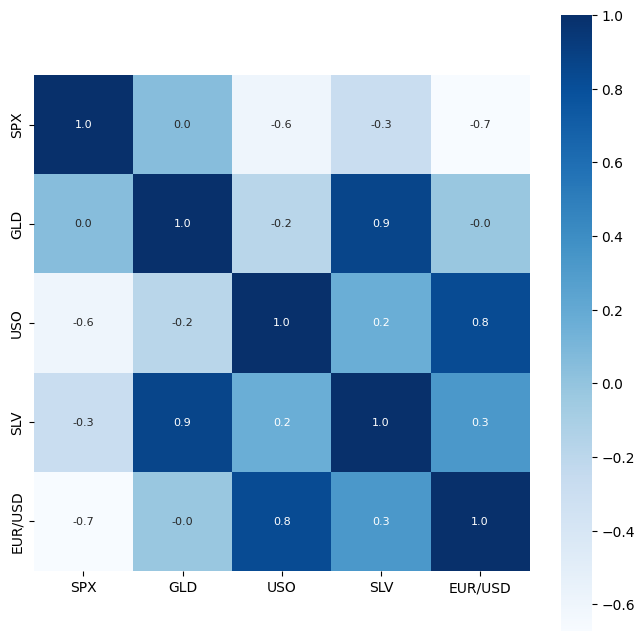

In [1515]:
plt.figure(figsize=(8, 8))
sn.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size": 8}, cmap="Blues")

In [1516]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


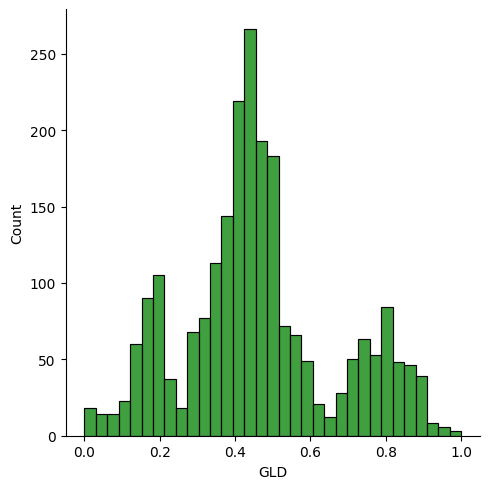

In [1517]:
sn.displot(data["GLD"], color="green")

In [1518]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,0.350870,0.129680,0.643809,0.164801,1.471692
1,1/3/2008,0.350870,0.135876,0.642896,0.167535,1.474491
2,1/4/2008,0.334693,0.132036,0.633218,0.164462,1.475492
3,1/7/2008,0.336765,0.128894,0.616691,0.161494,1.468299
4,1/8/2008,0.324931,0.146435,0.621804,0.175475,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,0.908507,0.476394,0.055698,0.173392,1.186789
2286,5/9/2018,0.920286,0.474125,0.058528,0.173913,1.184722
2287,5/10/2018,0.931796,0.481543,0.058893,0.179380,1.191753
2288,5/14/2018,0.935010,0.475521,0.058619,0.174694,1.193118


In [1519]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,0.350870,0.129680,0.643809,0.164801,1.471692
1,1/3/2008,0.350870,0.135876,0.642896,0.167535,1.474491
2,1/4/2008,0.334693,0.132036,0.633218,0.164462,1.475492
3,1/7/2008,0.336765,0.128894,0.616691,0.161494,1.468299
4,1/8/2008,0.324931,0.146435,0.621804,0.175475,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,0.908507,0.476394,0.055698,0.173392,1.186789
2286,5/9/2018,0.920286,0.474125,0.058528,0.173913,1.184722
2287,5/10/2018,0.931796,0.481543,0.058893,0.179380,1.191753
2288,5/14/2018,0.935010,0.475521,0.058619,0.174694,1.193118


In [1520]:
x = data.drop(["GLD", "Date"], axis="columns")
y = data["GLD"]

In [1521]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [1522]:
x_train

,SPX,USO,SLV,EUR/USD
476,0.210336,0.290632,0.209320,1.361693
1958,0.694979,0.024379,0.180942,1.063886
248,0.011059,0.150840,0.102057,1.256408
2231,0.901258,0.035884,0.174954,1.225280
1325,0.529221,0.228999,0.275189,1.366998
...,...,...,...,...
1071,0.333564,0.222425,0.628222,1.287515
433,0.207828,0.295015,0.218172,1.442398
674,0.277548,0.279858,0.482687,1.357276
1099,0.357577,0.237034,0.529289,1.306745


In [1523]:
model = Sequential([
    Dense(7, input_shape=(4, ), activation="relu"),
    Dense(5, activation="relu"),
    Dense(8, activation="relu"),
    Dense(6, activation="relu"),
    Dense(4, activation="relu"),
    Dense(3, activation="relu"),
    Dense(1)
])

model.compile(
    optimizer = "SGD",
    loss = "mean_absolute_error",
    metrics = ["mean_absolute_error"]

    # loss = "mean_squared_error",
    # metrics = ["mean_squared_error"]

)

In [1524]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200


58/58 [==============================] - 0s 637us/step - loss: 0.2647 - mean_absolute_error: 0.2647
Epoch 2/200
58/58 [==============================] - 0s 556us/step - loss: 0.1533 - mean_absolute_error: 0.1533
Epoch 3/200
58/58 [==============================] - 0s 485us/step - loss: 0.1522 - mean_absolute_error: 0.1522
Epoch 4/200
58/58 [==============================] - 0s 478us/step - loss: 0.1510 - mean_absolute_error: 0.1510
Epoch 5/200
58/58 [==============================] - 0s 481us/step - loss: 0.1485 - mean_absolute_error: 0.1485
Epoch 6/200
58/58 [==============================] - 0s 469us/step - loss: 0.1469 - mean_absolute_error: 0.1469
Epoch 7/200
58/58 [==============================] - 0s 452us/step - loss: 0.1459 - mean_absolute_error: 0.1459
Epoch 8/200
58/58 [==============================] - 0s 491us/step - loss: 0.1450 - mean_absolute_error: 0.1450
Epoch 9/200
58/58 [==============================] - 0s 486us/step - loss: 0.1441 - mean_absolute_error: 0.1441
Epoc

In [1525]:
pred = model.predict(x_test)


15/15 [==============================] - 0s 519us/step


In [1526]:
model.evaluate(x_test, y_test)

15/15 [==============================] - 0s 620us/step - loss: 0.0426 - mean_absolute_error: 0.0426


[0.04255009815096855, 0.04255009815096855]

In [1527]:
pred_arr = pd.DataFrame({"Reals": y_test.squeeze(), "Predictions": pred.squeeze()})
pred_arr

,Reals,Predictions
903,0.855398,0.820904
129,0.098002,0.079866
1787,0.369317,0.328348
1913,0.502574,0.489235
2048,0.433022,0.448208
...,...,...
923,0.841086,0.821985
1693,0.317480,0.293252
2054,0.455886,0.450258
658,0.557029,0.709478


In [1528]:
x_test.head(1)

,SPX,USO,SLV,EUR/USD
903,0.307521,0.277301,0.626139,1.324854


In [1529]:
y_test[x_test.index[0]]

0.8553975689116875

In [1530]:
y_test

903     0.855398
129     0.098002
1787    0.369317
1913    0.502574
2048    0.433022
          ...   
923     0.841086
1693    0.317480
2054    0.455886
658     0.557029
376     0.282398
Name: GLD, Length: 458, dtype: float64

In [1531]:
pred = model.predict([x_test.head(1)])
print(pred, y_test[x_test.index[0]])

1/1 [==============================] - 0s 48ms/step
[[0.82090366]] 0.8553975689116875


In [1532]:
x_test

,SPX,USO,SLV,EUR/USD
903,0.307521,0.277301,0.626139,1.324854
129,0.270896,0.784697,0.119760,1.472581
1787,0.547966,0.008674,0.142932,1.119996
1913,0.685126,0.027392,0.254361,1.127142
2048,0.763279,0.024836,0.220516,1.067247
...,...,...,...,...
923,0.316135,0.302502,0.634470,1.327492
1693,0.580857,0.063641,0.133819,1.129089
2054,0.761485,0.028305,0.223379,1.064453
658,0.271962,0.271366,0.509503,1.315686


In [1533]:
owm_pred = model.predict([[0.310900, 0.108928989, 0.92938, 1.09013]])
owm_pred

1/1 [==============================] - 0s 62ms/step


array([[0.7863027]], dtype=float32)

In [1534]:
total_pred = model.predict(x)
# len(total_pred)

total_pred = pd.DataFrame(total_pred)
total_pred.columns = ["Predictions"]


72/72 [==============================] - 0s 443us/step


In [1535]:
total_pred = model.predict(x)
total_pred = pd.DataFrame(total_pred)
total_pred.columns = ["Predictions"]
total_pred

72/72 [==============================] - 0s 397us/step


,Predictions
0,0.133849
1,0.136117
2,0.133953
3,0.133581
4,0.145157
...,...
2285,0.413251
2286,0.414734
2287,0.423768
2288,0.419034


In [1536]:
data = pd.concat([data, total_pred], axis="columns")
data

,Date,SPX,GLD,USO,SLV,EUR/USD,Predictions
0,1/2/2008,0.350870,0.129680,0.643809,0.164801,1.471692,0.133849
1,1/3/2008,0.350870,0.135876,0.642896,0.167535,1.474491,0.136117
2,1/4/2008,0.334693,0.132036,0.633218,0.164462,1.475492,0.133953
3,1/7/2008,0.336765,0.128894,0.616691,0.161494,1.468299,0.133581
4,1/8/2008,0.324931,0.146435,0.621804,0.175475,1.557099,0.145157
...,...,...,...,...,...,...,...
2285,5/8/2018,0.908507,0.476394,0.055698,0.173392,1.186789,0.413251
2286,5/9/2018,0.920286,0.474125,0.058528,0.173913,1.184722,0.414734
2287,5/10/2018,0.931796,0.481543,0.058893,0.179380,1.191753,0.423768
2288,5/14/2018,0.935010,0.475521,0.058619,0.174694,1.193118,0.419034


In [1537]:
sorted_data = data.sort_values(by="Date")
sorted_data

,Date,SPX,GLD,USO,SLV,EUR/USD,Predictions
6,1/10/2008,0.338654,0.159263,0.603177,0.187738,1.480100,0.157118
660,1/10/2011,0.270095,0.559560,0.275840,0.506118,1.289507,0.701452
882,1/10/2012,0.280262,0.773540,0.286523,0.525905,1.277596,0.721837
1102,1/10/2013,0.362234,0.802688,0.239317,0.544910,1.305483,0.771646
1323,1/10/2014,0.530810,0.438607,0.230369,0.274147,1.360711,0.446889
...,...,...,...,...,...,...,...
360,9/9/2009,0.162470,0.236321,0.264609,0.187712,1.458130,0.267991
583,9/9/2010,0.194710,0.449952,0.227630,0.272585,1.269309,0.401632
1245,9/9/2013,0.453108,0.557728,0.282871,0.364228,1.325803,0.534812
1468,9/9/2014,0.597316,0.443931,0.243426,0.246290,1.294197,0.406185


In [1538]:
# IMPORTANT
data['Date'] = pd.to_datetime(data['Date']).astype(object)  
data = data.sort_values(by='Date')

In [1539]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD,Predictions
0,2008-01-02 00:00:00,0.350870,0.129680,0.643809,0.164801,1.471692,0.133849
1,2008-01-03 00:00:00,0.350870,0.135876,0.642896,0.167535,1.474491,0.136117
2,2008-01-04 00:00:00,0.334693,0.132036,0.633218,0.164462,1.475492,0.133953
3,2008-01-07 00:00:00,0.336765,0.128894,0.616691,0.161494,1.468299,0.133581
4,2008-01-08 00:00:00,0.324931,0.146435,0.621804,0.175475,1.557099,0.145157
...,...,...,...,...,...,...,...
2285,2018-05-08 00:00:00,0.908507,0.476394,0.055698,0.173392,1.186789,0.413251
2286,2018-05-09 00:00:00,0.920286,0.474125,0.058528,0.173913,1.184722,0.414734
2287,2018-05-10 00:00:00,0.931796,0.481543,0.058893,0.179380,1.191753,0.423768
2288,2018-05-14 00:00:00,0.935010,0.475521,0.058619,0.174694,1.193118,0.419034


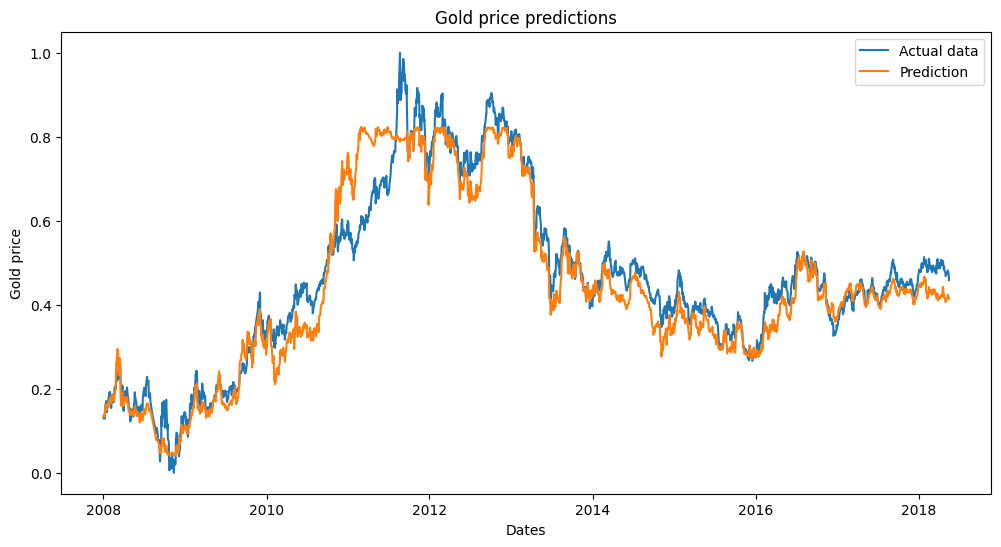

In [1540]:
plt.figure(figsize=(12, 6))


plt.plot(data['Date'], data['GLD'], label='Actual data', marker=' ')
plt.plot(data['Date'], data['Predictions'], label='Prediction', marker=' ')

plt.xlabel('Dates')
plt.ylabel('Gold price')
plt.title('Gold price predictions')
plt.legend()

plt.show()